In [1]:
#India Exports Project. 

In [2]:
#Import Data
import pandas as pd
df= pd.read_csv("C:/Users/Data Nerd/Downloads/Export_Data.csv")

What are our research questions or want to achieve after our study. 

1. Top exports country and volume.
2  General trend of the exports over the years.
3. How can they maximise revenue. (Just ideas and explore the data)
4. A model to predict the volume of imports. 

The data is very limited. There is not much we can do but lets see what we can do.


In [4]:
df.head()

,ROWID,Country,SourceYear,Name of the export country,Export value,YearCode,Year
0,1,India,1996-97,FR POLYNESIA,0.26,1996,"Financial Year (Apr - Mar), 1996"
1,2,India,1996-97,PACIFIC IS,1.52,1996,"Financial Year (Apr - Mar), 1996"
2,3,India,1996-97,MONTSERRAT,1.54,1996,"Financial Year (Apr - Mar), 1996"
3,4,India,1996-97,PITCAIRN IS.,1.88,1996,"Financial Year (Apr - Mar), 1996"
4,5,India,1996-97,TIMOR LESTE,3.47,1996,"Financial Year (Apr - Mar), 1996"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6070 entries, 0 to 6069
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ROWID                       6070 non-null   int64  
 1   Country                     6070 non-null   object 
 2   SourceYear                  6070 non-null   object 
 3   Name of the export country  6070 non-null   object 
 4   Export value                5989 non-null   float64
 5   YearCode                    6070 non-null   int64  
 6   Year                        6070 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 332.1+ KB


In [4]:
#Check for Missing Values. Before dropping rows with null values.
df.isnull().sum()

ROWID                          0
Country                        0
SourceYear                     0
Name of the export country     0
Export value                  81
YearCode                       0
Year                           0
dtype: int64

In [23]:
#Drop Rows with Missing Values.
df= df.dropna()

In [24]:
#Check for Missing Values. After dropping rows with null values.
df.isnull().sum()

ROWID             0
Home Country      0
SourceYear        0
Export Country    0
Export value      0
YearCode          0
Year              0
dtype: int64

In [7]:
#Sort Values by top export Countries.
df.sort_values(by='Export value', ascending=False)

,ROWID,Country,SourceYear,Name of the export country,Export value,YearCode,Year
6064,6065,India,2021-22,U S A,56796119.26,2021,"Financial Year (Apr - Mar), 2021"
5832,5833,India,2020-21,U S A,38184452.93,2020,"Financial Year (Apr - Mar), 2020"
5598,5599,India,2019-20,U S A,37616554.11,2019,"Financial Year (Apr - Mar), 2019"
5351,5352,India,2018-19,U S A,36648039.35,2018,"Financial Year (Apr - Mar), 2018"
5116,5117,India,2017-18,U S A,30860269.10,2017,"Financial Year (Apr - Mar), 2017"
...,...,...,...,...,...,...,...
5360,5361,India,2019-20,GUERNSEY,0.01,2019,"Financial Year (Apr - Mar), 2019"
2751,2752,India,2008-09,PACIFIC IS,0.01,2008,"Financial Year (Apr - Mar), 2008"
4165,4164,India,2014-15,CHANNEL IS,0.01,2014,"Financial Year (Apr - Mar), 2014"
5361,5362,India,2019-20,JERSEY,0.01,2019,"Financial Year (Apr - Mar), 2019"


In [25]:
#Rename Country Columns. 
df= df.rename(columns={"Name of the export country": 'Export Country', "Country":"Home Country"})
print(df)

      ROWID Home Country SourceYear Export Country  Export value  YearCode  \
0         1        India    1996-97   FR POLYNESIA          0.26      1996   
1         2        India    1996-97     PACIFIC IS          1.52      1996   
2         3        India    1996-97     MONTSERRAT          1.54      1996   
3         4        India    1996-97   PITCAIRN IS.          1.88      1996   
4         5        India    1996-97    TIMOR LESTE          3.47      1996   
...     ...          ...        ...            ...           ...       ...   
6060   6061        India    2021-22     NETHERLAND    9372473.48      2021   
6061   6062        India    2021-22  BANGLADESH PR   12053472.57      2021   
6062   6063        India    2021-22     CHINA P RP   15821547.51      2021   
6063   6064        India    2021-22    U ARAB EMTS   20915828.49      2021   
6064   6065        India    2021-22          U S A   56796119.26      2021   

                                  Year  
0     Financial Year (

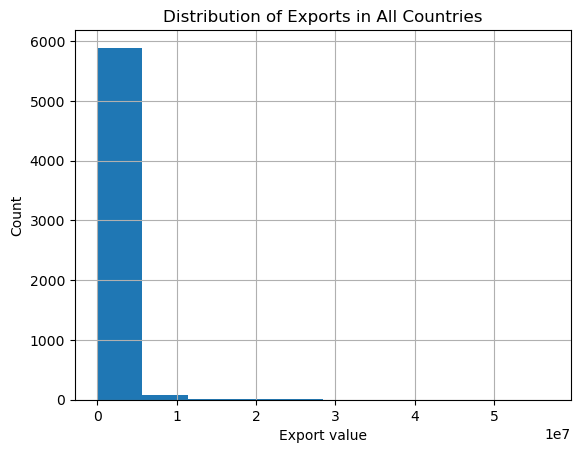

In [19]:
#Create an Histogram of Exports
df['Export value'].hist()
# Add labels and title
plt.xlabel('Export value')
plt.ylabel('Count')
plt.title('Distribution of Exports in All Countries')

# Show the plot
plt.show()

In [ ]:
#The values seem to lie within a certain range we have to introduce percentile in order to capture where most values lie. 

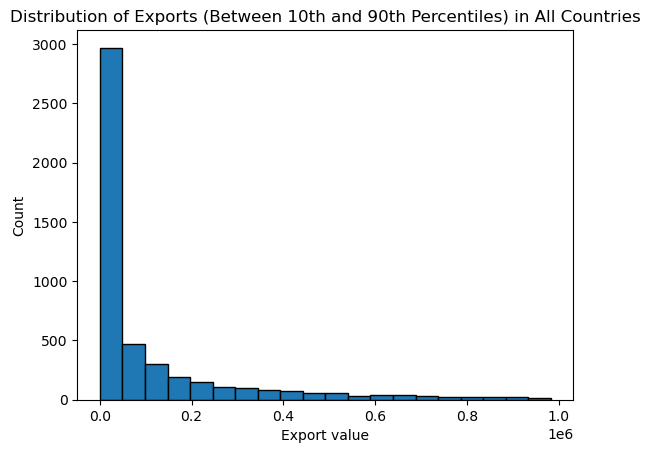

In [20]:
import matplotlib.pyplot as plt
import plotly.express as px
# Calculate percentiles
lower_percentile = df['Export value'].quantile(0.10)
upper_percentile = df['Export value'].quantile(0.90)

# Filter data within percentiles
filtered_df = df[(df['Export value'] >= lower_percentile) & (df['Export value'] <= upper_percentile)]

# Create histogram for filtered data
plt.hist(filtered_df['Export value'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Export value')
plt.ylabel('Count')
plt.title('Distribution of Exports (Between 10th and 90th Percentiles) in All Countries')

# Show the plot
plt.show()

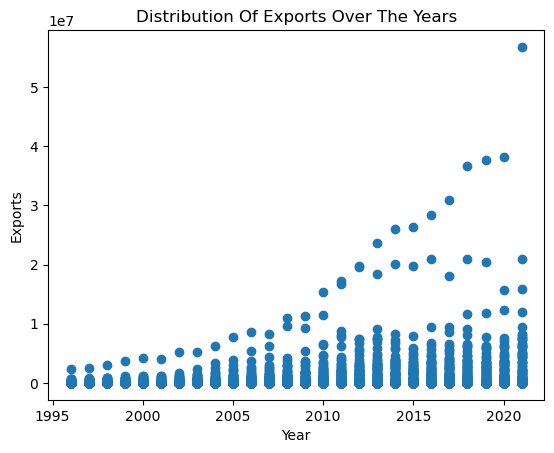

In [9]:
#Scatter plot of Exports vs Year
plt.scatter(df['YearCode'] , df['Export value'])
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Exports')
plt.title('Distribution Of Exports Over The Years')

# Show the plot
plt.show()

In [40]:
#Count lets create a column to count top countries and total exported value per year.
df3 = df[["Export Country", "Export value", "YearCode"]]
df3.sort_values(by="Export value", ascending=False)

,Export Country,Export value,YearCode
6064,U S A,56796119.26,2021
5832,U S A,38184452.93,2020
5598,U S A,37616554.11,2019
5351,U S A,36648039.35,2018
5116,U S A,30860269.10,2017
...,...,...,...
5360,GUERNSEY,0.01,2019
2751,PACIFIC IS,0.01,2008
4165,CHANNEL IS,0.01,2014
5361,JERSEY,0.01,2019


In [41]:
#Top 10 countries by export and year with highest exports. 
df3.tail(10)

,Export Country,Export value,YearCode
6055,GERMANY,7371637.84,2021
6056,BELGIUM,7522465.09,2021
6057,U K,7799211.31,2021
6058,HONG KONG,8183452.88,2021
6059,SINGAPORE,8301294.51,2021
6060,NETHERLAND,9372473.48,2021
6061,BANGLADESH PR,12053472.57,2021
6062,CHINA P RP,15821547.51,2021
6063,U ARAB EMTS,20915828.49,2021
6064,U S A,56796119.26,2021


<Axes: >

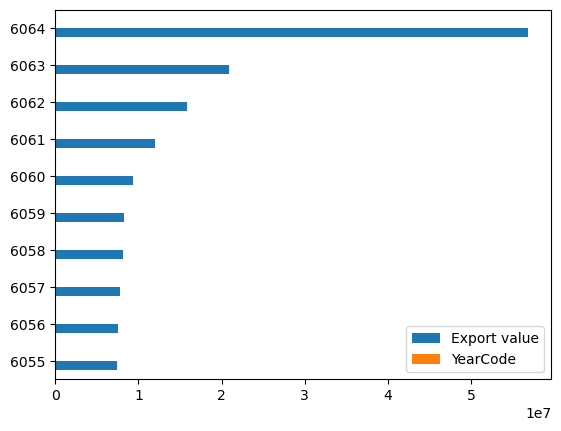

In [42]:
#Horizontal Bar Chart.
df3.tail(10).plot(kind="barh" )

In [53]:
df['Export value'].describe()

count    5.989000e+03
mean     4.783565e+05
std      1.971221e+06
min      0.000000e+00
25%      1.461210e+03
50%      2.211462e+04
75%      1.840043e+05
max      5.679612e+07
Name: Export value, dtype: float64

In [ ]:
#Create a linear regression model to predict the export value.
